# **Analysis on Online Retail Dataset**
# **Date: 3rd August 2025**
# **Technologies Used: Python, NumPy, Pandas, Matplotlib, Seaborn**

## -o) Import libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

## -o) Load dataset

In [137]:
df = pd.read_csv("Online_Retail.csv")



## -o) Basic Information for Understanding Data

In [138]:
# Check Data Set Loaded Successfully!
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [139]:
# Inspect data size, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [140]:
# Check Stats of Data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [141]:
# Dulpiate Data
print('Duplicate Data',df.duplicated().sum()) # Duplicate Data 5268
df.drop_duplicates(inplace=True)
print('Duplicate Data',df.duplicated().sum()) # Duplicate Data 0


Duplicate Data 5268
Duplicate Data 0


In [142]:
df = df.drop_duplicates() # Drop Duplicate
# - Check columns like InvoiceNo, StockCode, CustomerID, InvoiceDate, Quantity, UnitPrice
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [143]:
# Missing values in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [144]:
print('Total Numbers of Rows : ',df.shape[0])
print('Total Numbers of Colume : ',df.shape[1])

Total Numbers of Rows :  536641
Total Numbers of Colume :  8


## -o) Data Cleaning

In [145]:
# Drop records with missing CustomerID
df.dropna(subset=['CustomerID'],inplace=True)

In [146]:
# Remove rows with negative or zero values in Quantity or UnitPrice (you can handle returns separately)
return_df = df[(df['Quantity'] <= 0) & (df['UnitPrice'] <= 0)] # only include cancle or returned order
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [147]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],errors = 'coerce')
# print(df['InvoiceDate'])

In [148]:
# Again inspect data size, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [149]:
# Again check Stats of Data
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


## -o) Calculation of RFM Metrics

In [150]:
#   Set the **reference date** (e.g., one day after the last **InvoiceDate**)
reference_date = df['InvoiceDate'].max()+pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

In [151]:

# ooo)RFM Metrics
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).sort_values(by='InvoiceNo',ascending=False)

print(rfm)  # See



            InvoiceDate  InvoiceNo  TotalPrice
CustomerID                                    
12748.0               1        209    33053.19
14911.0               1        201   143711.17
17841.0               2        124    40519.84
13089.0               3         97    58762.08
14606.0               1         93    12076.15
...                 ...        ...         ...
18213.0             237          1      232.48
18215.0              89          1      299.34
18269.0             366          1      168.60
18274.0              30          1      175.92
18240.0              46          1      422.58

[4338 rows x 3 columns]


In [152]:
rfm = rfm.reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
# print(rfm.columns)
# print(df.columns)
# print(len(df))
# df = pd.merge(df,rfm , on='CustomerID' , how='outer')
# print(df.columns)
# print(len(df))


# print(rfm['Recency'])

rfm # See

,CustomerID,Recency,Frequency,Monetary
0,12748.0,1,209,33053.19
1,14911.0,1,201,143711.17
2,17841.0,2,124,40519.84
3,13089.0,3,97,58762.08
4,14606.0,1,93,12076.15
...,...,...,...,...
4333,18213.0,237,1,232.48
4334,18215.0,89,1,299.34
4335,18269.0,366,1,168.60
4336,18274.0,30,1,175.92


In [153]:

# ooo)RFM Scoring & Binning

#  Score Recency, Frequency, and Monetary on a 1–5 scale using quantiles

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm # See


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12748.0,1,209,33053.19,5,5,5
1,14911.0,1,201,143711.17,5,5,5
2,17841.0,2,124,40519.84,5,5,5
3,13089.0,3,97,58762.08,5,5,5
4,14606.0,1,93,12076.15,5,5,5
...,...,...,...,...,...,...,...
4333,18213.0,237,1,232.48,1,2,1
4334,18215.0,89,1,299.34,2,2,2
4335,18269.0,366,1,168.60,1,2,1
4336,18274.0,30,1,175.92,4,2,1


In [154]:

#  ooo)Create a combined RFM score (e.g., R\_score × 100 + F\_score × 10 + M\_score)
rfm['Combine_score'] =   rfm['R_Score'].astype(int) * 100 + rfm['F_Score'].astype(int) * 10 + rfm['M_Score'].astype(int)

rfm # See

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Combine_score
0,12748.0,1,209,33053.19,5,5,5,555
1,14911.0,1,201,143711.17,5,5,5,555
2,17841.0,2,124,40519.84,5,5,5,555
3,13089.0,3,97,58762.08,5,5,5,555
4,14606.0,1,93,12076.15,5,5,5,555
...,...,...,...,...,...,...,...,...
4333,18213.0,237,1,232.48,1,2,1,121
4334,18215.0,89,1,299.34,2,2,2,222
4335,18269.0,366,1,168.60,1,2,1,121
4336,18274.0,30,1,175.92,4,2,1,421


In [155]:

# ooo)Customer Segmentation (Labeling) 🏷️
#    - Classic labels:
#      • Champions
#      • Loyal Customers
#      • Potential Loyalists
#      • At Risk
#      • Lost Customers
#    - Customize label names based on business needs
def assign_segment(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Champions'
    elif row['F_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 2:
        return 'Potential Loyalists'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'At Risk'
    elif row['R_Score'] == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)


rfm # See

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Combine_score,Segment
0,12748.0,1,209,33053.19,5,5,5,555,Champions
1,14911.0,1,201,143711.17,5,5,5,555,Champions
2,17841.0,2,124,40519.84,5,5,5,555,Champions
3,13089.0,3,97,58762.08,5,5,5,555,Champions
4,14606.0,1,93,12076.15,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,18213.0,237,1,232.48,1,2,1,121,At Risk
4334,18215.0,89,1,299.34,2,2,2,222,At Risk
4335,18269.0,366,1,168.60,1,2,1,121,At Risk
4336,18274.0,30,1,175.92,4,2,1,421,Potential Loyalists


## -o) Data visualizations

## **Questions:**
---


### Recency vs Monetary.
> Scatter plot (Recency vs Monetary) with segment colors.



---

### Show revenue contribution.
> Create a revenue contribution using a pie or Pareto chart.




---



### Revenue trend over time.

> Line plot of Revenue trend over time.

---



### Chart of average R, F, M per segment.
> Heatmap/bar chart of average R, F, M per segment.


In [156]:
# In order to avoid warnings in the output (Use this library only after completing the whole code)
import warnings
warnings.filterwarnings("ignore")
# matplotlib font warnings specific hide karne ke liye:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [157]:
# ooo) Pre Step
#    Show revenue contribution using a pie or Pareto chart
df['revenue'] = abs(df['Quantity'])*df['UnitPrice']
country_revenue = df.groupby('Country')['revenue'].sum().sort_values(ascending=False).head(5)
print(country_revenue)
print(country_revenue.index)

# ooo) Pre Step
#    - Line plot of Revenue trend over time
df['MonthYearStr'] = df['InvoiceDate'].dt.strftime('%b-%Y')
trends = df.groupby('MonthYearStr')['revenue'].sum()
print(trends)
trends = trends.reindex(['Dec-2010','Jan-2011','Feb-2011','Mar-2011','Apr-2011','May-2011','Jun-2011','Jul-2011','Aug-2011','Sep-2011','Oct-2011','Nov-2011','Dec-2011'] )
print(trends)


# ooo) Pre Step
#    - Heatmap/bar chart of average R, F, M per segment
segment_avg = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(segment_avg.corr())




Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: revenue, dtype: float64
Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')
MonthYearStr
Apr-2011     468374.331
Aug-2011     644051.040
Dec-2010     570422.730
Dec-2011     517190.440
Feb-2011     446084.920
Jan-2011     568101.310
Jul-2011     598962.901
Jun-2011     660046.050
Mar-2011     594081.760
May-2011     677355.150
Nov-2011    1156205.610
Oct-2011    1035642.450
Sep-2011     950690.202
Name: revenue, dtype: float64
MonthYearStr
Dec-2010     570422.730
Jan-2011     568101.310
Feb-2011     446084.920
Mar-2011     594081.760
Apr-2011     468374.331
May-2011     677355.150
Jun-2011     660046.050
Jul-2011     598962.901
Aug-2011     644051.040
Sep-2011     950690.202
Oct-2011    1035642.450
Nov-2011    1156205.610
Dec-2011     517190.440
Name: revenue, dtype: float64


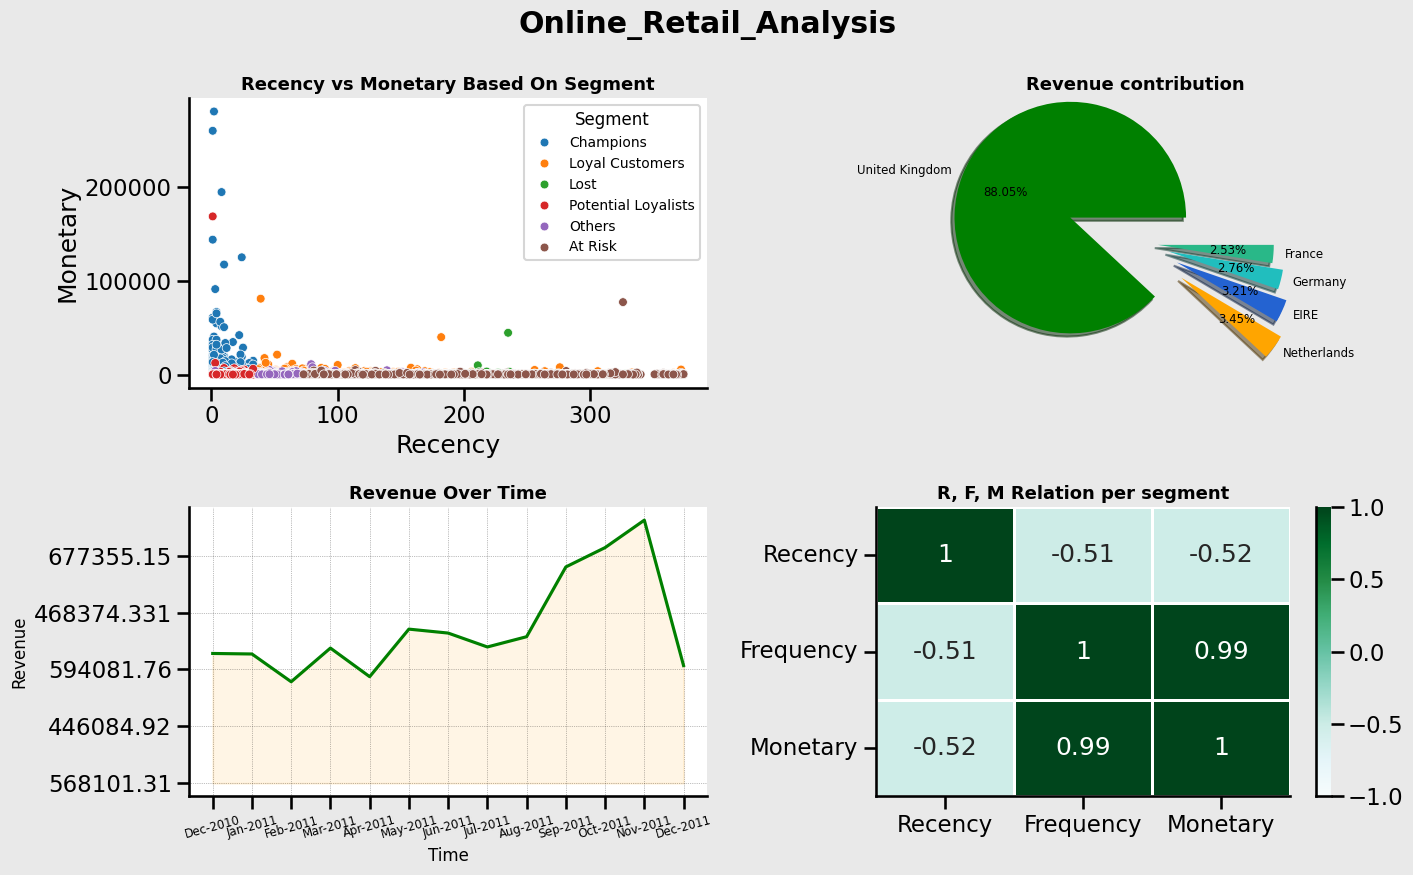

In [158]:
fig,ax = plt.subplots(2,2,figsize = (14.5, 9) ,facecolor="#E9E9E9" )
sns.set_context('talk')
plt.suptitle('Online_Retail_Analysis',fontweight = 700 , fontfamily = 'cursive')


#    - Scatter plot (Recency vs Monetary) with segment colors
ax[0][0].set_title('Recency vs Monetary Based On Segment',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
sns.scatterplot(data=rfm , x = 'Recency' , y = 'Monetary', hue='Segment',ax=ax[0][0],s=40)
font_props = fm.FontProperties(family='cursive', size=10)
ax[0][0].legend(title='Segment', prop=font_props, title_fontsize=12)

#    Show revenue contribution using a pie or Pareto chart
df['revenue'] = abs(df['Quantity'])*df['UnitPrice']
country_revenue = df.groupby('Country')['revenue'].sum().sort_values(ascending=False).head(5)
ax[0][1].set_title('Revenue contribution',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
ax[0][1].pie(country_revenue.values,labels=country_revenue.index,explode=[0.6,0.5,0.4,0.3,0.2],textprops={'fontsize' : 8.5 , 'fontweight' : 400 ,'fontfamily' : 'cursive', 'color' : "#000000"},colors=['green','orange',"#2463d1","#21bebe","#29B888"],radius = 1 ,shadow=True,counterclock=True , autopct='%.2f%%')

#    - Line plot of Revenue trend over time
ax[1][0].set_title('Revenue Over Time',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
ax[1][0].set_xlabel('Time',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[1][0].set_ylabel('Revenue',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
ax[1][0].set_xticklabels(trends.index, fontfamily='cursive',rotation = 15,fontsize = 8.5)
ax[1][0].set_yticklabels(trends.values, fontfamily='cursive')
ax[1][0].grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
ax[1][0].fill_between(trends.index,trends.values , alpha = 0.1 , color = '#FFA500')
ax[1][0].plot(trends.index,trends.values,color='green')

#    - Heatmap/bar chart of average R, F, M per segment
ax[1][1].set_title('R, F, M Relation per segment',fontsize = 13 , fontweight = 600 , fontfamily = 'cursive')
sns.heatmap(data = segment_avg.corr() ,linewidths=1,edgecolor='black',annot=True, cmap='BuGn' ,vmax=1,vmin=-1)

sns.despine()
plt.tight_layout()
plt.savefig('Online_Retail.png',dpi=500)
plt.show()


